## Imports

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from clique_finding_models.analysis import load_experiment_results, get_exp_ids_from_sacred_dir, \
    process_exp_results_to_df

## Load configs and metrics

In [2]:
SACRED_DIR = os.path.join(os.getcwd(), "outputs", "sacred")
changing_hparams = [
    "conv_layers",
    "hidden_layers",
    "learning_rate",
]

BASELINES = [
    "mean_bl", "degree_bl", "rank_deg_bl", "rank_deg_den_bl"
]

MODEL = "s2v2"

exp_ids = get_exp_ids_from_sacred_dir(SACRED_DIR)
exp_results = [load_experiment_results(os.path.join(SACRED_DIR, str(exp_id)))
               for exp_id in exp_ids]
results = process_exp_results_to_df(exp_ids, exp_results, changing_hparams)
results = results.loc[results.model.isin(BASELINES + [MODEL]), :].reset_index()
results.head()

,index,transform_y,status,batch_size,train,data_set,epochs,exp_id,tag,model,...,train.mse,train.top5,val.frac_mc,val.top5,val.top1,hidden_layers,conv_layers,learning_rate,val.loss,train.loss
0,0,none,COMPLETED,32,True,small_dimacs_bhoslib,2,1,abs,mean_bl,...,1.730645e+01,0.6635,0.688374,0.704,0.75,NaN,NaN,NaN,NaN,NaN
1,1,none,COMPLETED,32,True,small_dimacs_bhoslib,2,2,abs,degree_bl,...,3.618928e+00,0.9285,0.861880,0.928,0.96,NaN,NaN,NaN,NaN,NaN
2,2,none,COMPLETED,32,True,small_dimacs_bhoslib,2,3,abs,rank_deg_bl,...,2.574412e+01,0.9285,0.861880,0.928,0.96,NaN,NaN,NaN,NaN,NaN
3,3,none,COMPLETED,32,True,small_dimacs_bhoslib,2,4,abs,rank_deg_den_bl,...,1.687512e+14,0.9360,0.880035,0.946,0.96,NaN,NaN,NaN,NaN,NaN
4,5,none,COMPLETED,8,True,small_dimacs_bhoslib,3,6,abs,s2v2,...,3.444728e+00,0.9370,0.885824,0.954,0.96,2.0,3.0,0.01,2.920086,3.444728


## Best performing models overall

In [3]:
cols = ["exp_id", "model", "tag", "epochs", "val.mse", "val.frac_mc", "batch_size"] + changing_hparams
results.loc[:, "val.mse"] = results["val.mse"].round(4)
results.loc[:, "val.frac_mc"] = results["val.frac_mc"].round(4)

trained = results[cols]

trained_best = trained.loc[trained.groupby(["model", "tag"])["val.mse"].idxmin()]
trained_best.sort_values(by="val.mse", ascending=True).head(10)

,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
171,334,degree_bl,rel_mc,2,1.0693,0.8574,32,NaN,NaN,NaN
201,392,s2v2,rel_mc,3,1.2666,0.8807,8,3.0,2.0,0.0010
170,333,mean_bl,rel_mc,2,1.9150,0.6884,32,NaN,NaN,NaN
4,6,s2v2,abs,3,2.9201,0.8858,8,3.0,2.0,0.0100
322,630,s2v2,rel_deg,3,3.0232,0.8817,16,3.0,2.0,0.0001
1,2,degree_bl,abs,2,3.2454,0.8619,32,NaN,NaN,NaN
256,500,degree_bl,rel_deg,2,3.2454,0.8619,32,NaN,NaN,NaN
86,168,degree_bl,rank,2,3.2454,0.8619,32,NaN,NaN,NaN
255,499,mean_bl,rel_deg,2,6.1346,0.8619,32,NaN,NaN,NaN
103,200,s2v2,rank,3,7.1048,0.8830,16,4.0,4.0,0.0100


(0, 9)

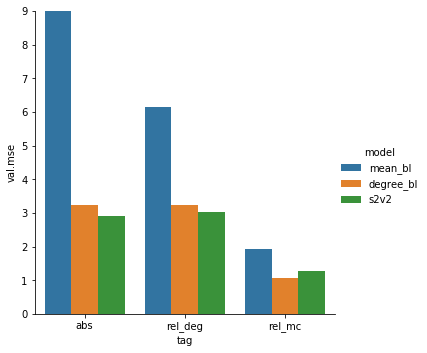

In [4]:
mse_model_order = ["mean_bl", "degree_bl", MODEL]
mse_tag_order = ["abs", "rel_deg", "rel_mc"]
grid = sns.catplot(x="tag", y="val.mse", data=trained_best, hue="model", hue_order=mse_model_order, order=mse_tag_order, kind="bar")
grid.axes[0,0].set_ylim(0,9)

In [5]:
trained_best = trained.loc[trained.groupby(["model", "tag"])["val.frac_mc"].idxmax()]
trained_best.sort_values(by="val.frac_mc", ascending=False).head(10)

,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
120,234,s2v2,rank,3,3.490920e+01,0.8954,8,4.0,3.0,0.0010
4,6,s2v2,abs,3,2.920100e+00,0.8858,8,3.0,2.0,0.0100
249,488,s2v2,rel_mc,3,1.635500e+00,0.8847,32,4.0,2.0,0.0001
313,612,s2v2,rel_deg,3,3.027600e+00,0.8830,8,3.0,2.0,0.0001
173,336,rank_deg_den_bl,rel_mc,2,2.122857e+16,0.8807,32,NaN,NaN,NaN
258,502,rank_deg_den_bl,rel_deg,2,4.492407e+16,0.8807,32,NaN,NaN,NaN
88,170,rank_deg_den_bl,rank,2,1.721108e+14,0.8800,32,NaN,NaN,NaN
3,4,rank_deg_den_bl,abs,2,1.721108e+14,0.8800,32,NaN,NaN,NaN
86,168,degree_bl,rank,2,3.245400e+00,0.8619,32,NaN,NaN,NaN
172,335,rank_deg_bl,rel_mc,2,1.876944e+04,0.8619,32,NaN,NaN,NaN


(0.65, 0.95)

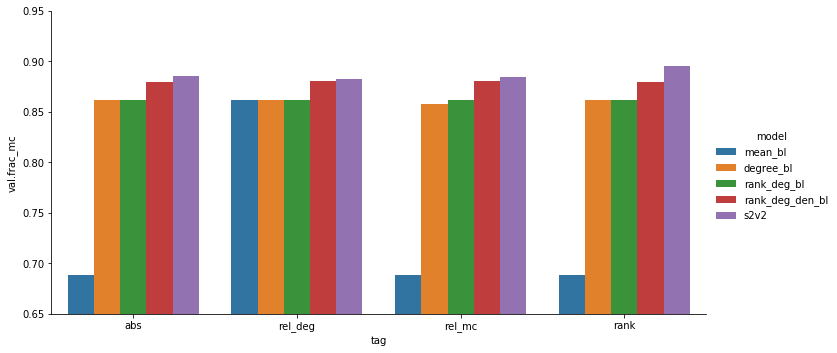

In [6]:
rank_model_order = ["mean_bl", "degree_bl", "rank_deg_bl", "rank_deg_den_bl", MODEL]
rank_tag_order = ["abs", "rel_deg", "rel_mc", "rank"]
grid = sns.catplot(x="tag", y="val.frac_mc", data=trained_best, 
                   hue="model", hue_order=rank_model_order, order=rank_tag_order, 
                   kind="bar", aspect=2)
grid.axes[0,0].set_ylim(0.65, 0.95)

## Best variants for type

### Abs

In [7]:
best = results[(results.tag == "abs")][cols].sort_values(by="val.mse", ascending=True).head(10).reset_index()
best

,index,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
0,4,6,s2v2,abs,3,2.9201,0.8858,8,3.0,2.0,0.0100
1,5,8,s2v2,abs,3,3.1983,0.8807,8,3.0,3.0,0.0100
2,1,2,degree_bl,abs,2,3.2454,0.8619,32,NaN,NaN,NaN
3,6,10,s2v2,abs,3,3.4170,0.8823,8,3.0,4.0,0.0100
4,9,16,s2v2,abs,3,3.6730,0.8821,8,4.0,4.0,0.0100
5,24,46,s2v2,abs,3,3.8894,0.8821,32,3.0,4.0,0.0100
6,31,60,s2v2,abs,3,4.0911,0.8827,8,3.0,2.0,0.0010
7,32,62,s2v2,abs,3,4.4186,0.8821,8,3.0,3.0,0.0010
8,13,24,s2v2,abs,3,4.7237,0.8821,16,3.0,2.0,0.0100
9,59,116,s2v2,abs,3,4.7343,0.8827,8,3.0,3.0,0.0001


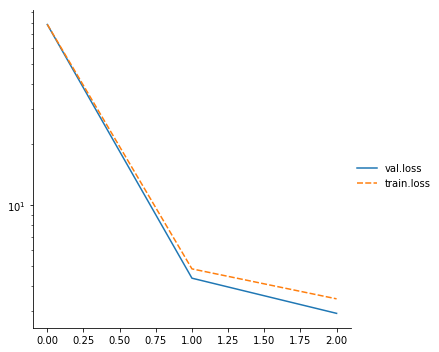

In [8]:
eid = [int(best.iloc[i]["exp_id"]) 
       for i in range(10) if best.loc[i]["model"] == MODEL][0]
grid = sns.relplot(data=exp_results[eid - 1][1][["val.loss", "train.loss"]], kind="line")
grid.set(yscale="log")

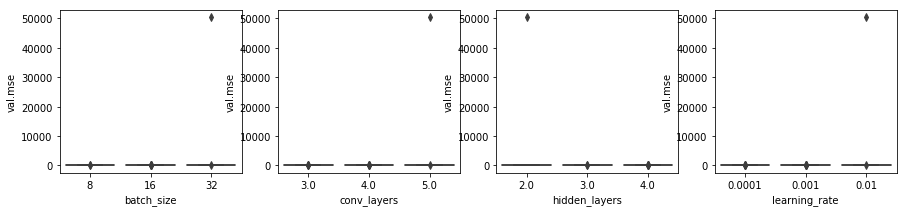

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "abs") & (results.model == MODEL)],
                x=axis, y="val.mse", ax=axes[i])

### Rel deg.

In [10]:
best = results[(results.tag == "rel_deg")][cols].sort_values(by="val.mse", ascending=True).head(10).reset_index()
best

,index,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
0,322,630,s2v2,rel_deg,3,3.0232,0.8817,16,3.0,2.0,0.0001
1,313,612,s2v2,rel_deg,3,3.0276,0.8830,8,3.0,2.0,0.0001
2,288,562,s2v2,rel_deg,3,3.0393,0.8824,8,3.0,4.0,0.0010
3,331,648,s2v2,rel_deg,3,3.0536,0.8818,32,3.0,2.0,0.0001
4,296,578,s2v2,rel_deg,3,3.1241,0.8816,16,3.0,3.0,0.0010
5,324,634,s2v2,rel_deg,3,3.1357,0.8810,16,3.0,4.0,0.0001
6,327,640,s2v2,rel_deg,3,3.1359,0.8798,16,4.0,4.0,0.0001
7,323,632,s2v2,rel_deg,3,3.1424,0.8810,16,3.0,3.0,0.0001
8,260,506,s2v2,rel_deg,3,3.1426,0.8810,8,3.0,3.0,0.0100
9,291,568,s2v2,rel_deg,3,3.1526,0.8804,8,4.0,4.0,0.0010


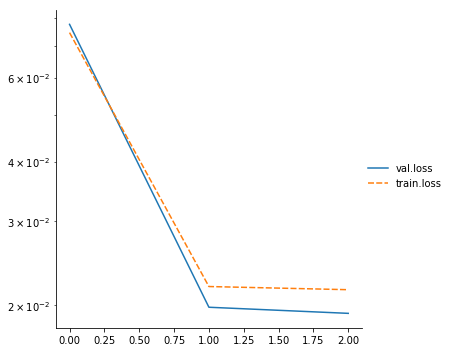

In [11]:
eid = [int(best.iloc[i]["exp_id"]) 
       for i in range(10) if best.loc[i]["model"] == MODEL][0]
grid = sns.relplot(data=exp_results[eid - 1][1][["val.loss", "train.loss"]], kind="line")
grid.set(yscale="log")

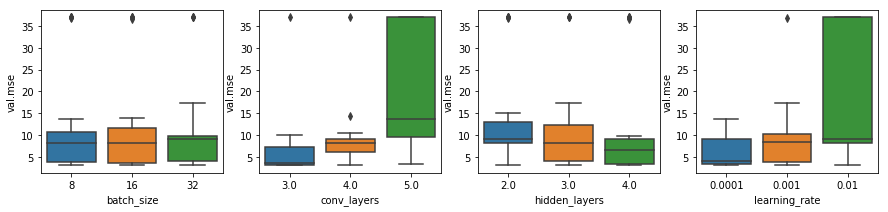

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "rel_deg") & (results.model == MODEL)],
                x=axis, y="val.mse", ax=axes[i])

### Rel MC

In [13]:
best = results[(results.tag == "rel_mc")][cols].sort_values(by="val.mse", ascending=True).head(10).reset_index()
best

,index,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
0,171,334,degree_bl,rel_mc,2,1.0693,0.8574,32,NaN,NaN,NaN
1,201,392,s2v2,rel_mc,3,1.2666,0.8807,8,3.0,2.0,0.0010
2,202,394,s2v2,rel_mc,3,1.3606,0.8809,8,3.0,3.0,0.0010
3,247,484,s2v2,rel_mc,3,1.3610,0.8821,32,3.0,3.0,0.0001
4,211,412,s2v2,rel_mc,3,1.3848,0.8821,16,3.0,3.0,0.0010
5,229,448,s2v2,rel_mc,3,1.4066,0.8821,8,3.0,3.0,0.0001
6,238,466,s2v2,rel_mc,3,1.4494,0.8821,16,3.0,3.0,0.0001
7,228,446,s2v2,rel_mc,3,1.4596,0.8821,8,3.0,2.0,0.0001
8,210,410,s2v2,rel_mc,3,1.4636,0.8821,16,3.0,2.0,0.0010
9,231,452,s2v2,rel_mc,3,1.4702,0.8821,8,4.0,2.0,0.0001


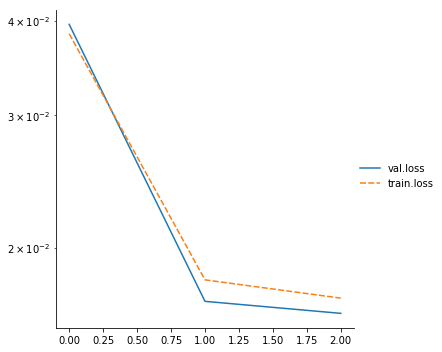

In [14]:
eid = [int(best.iloc[i]["exp_id"]) 
       for i in range(10) if best.loc[i]["model"] == MODEL][0]
grid = sns.relplot(data=exp_results[eid - 1][1][["val.loss", "train.loss"]], kind="line")
grid.set(yscale="log")

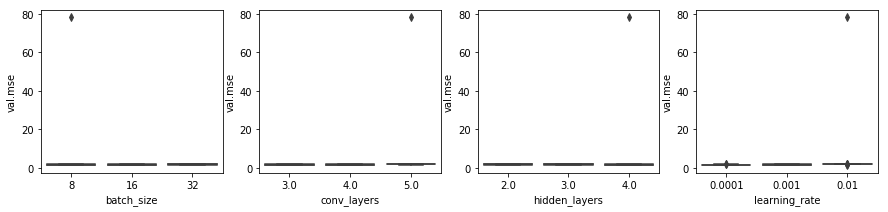

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "rel_mc") & (results.model == MODEL)],
                x=axis, y="val.mse", ax=axes[i])

### Rank

In [16]:
best = results[(results.tag == "rank")][cols].sort_values(by="val.frac_mc", ascending=False).head(10).reset_index()
best

,index,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
0,120,234,s2v2,rank,3,34.9092,0.8954,8,4.0,3.0,0.0010
1,116,226,s2v2,rank,3,45.0599,0.8902,8,3.0,2.0,0.0010
2,89,172,s2v2,rank,3,26.7229,0.8887,8,3.0,2.0,0.0100
3,137,268,s2v2,rank,3,10.0740,0.8871,32,4.0,2.0,0.0010
4,149,292,s2v2,rank,3,14.8651,0.8871,8,5.0,2.0,0.0001
5,158,310,s2v2,rank,3,28.2697,0.8871,16,5.0,2.0,0.0001
6,113,220,s2v2,rank,3,17.3135,0.8870,32,5.0,2.0,0.0100
7,125,244,s2v2,rank,3,39.9738,0.8858,16,3.0,2.0,0.0010
8,169,332,s2v2,rank,3,30.7696,0.8854,32,5.0,4.0,0.0001
9,160,314,s2v2,rank,3,18.9030,0.8854,16,5.0,4.0,0.0001


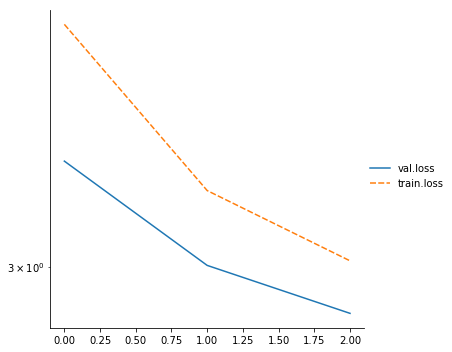

In [17]:
eid = [int(best.iloc[i]["exp_id"]) 
       for i in range(10) if best.loc[i]["model"] == MODEL][0]
grid = sns.relplot(data=exp_results[eid - 1][1][["val.loss", "train.loss"]], kind="line")
grid.set(yscale="log")

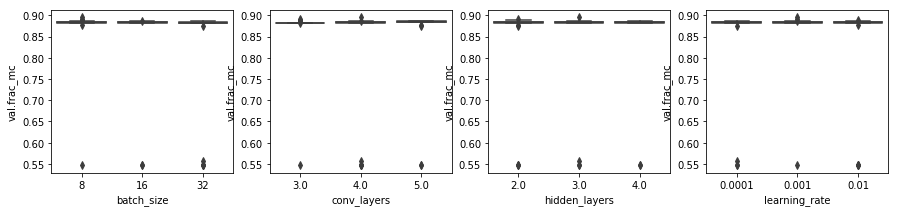

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "rank") & (results.model == MODEL)],
                x=axis, y="val.frac_mc", ax=axes[i])

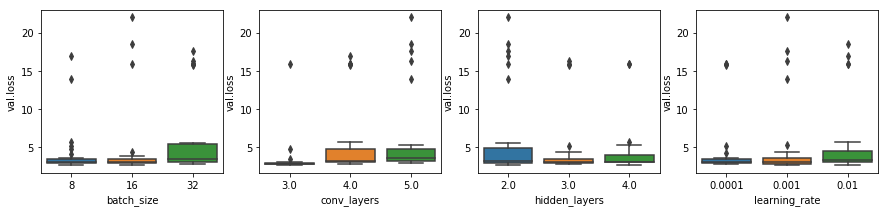

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "rank") & (results.model == MODEL)],
                x=axis, y="val.loss", ax=axes[i])